<a href="https://colab.research.google.com/github/jha-vineet69/Start-Up-Business-Analysis/blob/master/Acqwire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Will a Start-up succeed or fail?</center>
### <center>By Vineet Jha</center>
<figure>
<center>
<img src='https://www.biospectrumindia.com/uploads/articles/startup-plan-action-research-teamwork-brainstorm-concept-48583221.jpg'  width="600" height="400">
</center>
</figure>

[//]: # (https://tse1.mm.bing.net/th?id=OIP.9NNNMRoFGax-W4bCQvxaoAHaEc)
[//]: # (https://image.freepik.com/free-vector/start-up-business-background_1268-1347.jpg)


## BUSINESS PROBLEM
---
Investment strategies for investing in start-up companies are widely based on intuition or past experience. As a result, investors rely primarily on the need being addressed, background of the founders, size of the market being addressed and the ability of the company to scale after tasting early success. The question we pose here is, “can we perform some rigorous analysis that can be used to identify relevant factors and score prospective start- ups based on their potential to be successful”. This model/ analysis will then allow investors to make more informed decisions and rely less on their intuitions.



## SOLUTION
---

### IMPORTING LIBRARIES

In [1]:
!pip install squarify

In [2]:
#Keep Things Cleaner
import warnings
warnings.filterwarnings("ignore")


#Working with Data
import pandas as pd
import numpy as np


#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import squarify as sq


#General Utility
import os
import time
import datetime as dt
import random

#Fav Styling Options
#Option 1:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
#Option 2:
#plt.style.use('fivethirtyeight')
#Option 3:
#plt.style.use('ggplot')

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

### DATA CLEANING

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jha-vineet69/Start-Up-Business-Analysis/master/TrainData.csv')
df.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,4,No,0,Yes,Large,Yes,No,B2C,High,Yes,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,No,0,10,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,7,No,0,Yes,Medium,No,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,Yes,0,2,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,8,No,0,No,Small,No,No,B2B,High,Yes,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,13,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,4,No,2,No,Medium,No,No,Both,High,Yes,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,Yes,0,12,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,4,No,0,No,Large,Yes,No,B2B,High,Yes,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,20,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [4]:
df.columns = df.columns.str.replace(' ', '_')
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAX_ID                                    234 non-null    object 
 1   Dependent                                 234 non-null    int64  
 2   Company_Location                          234 non-null    object 
 3   Company_raising_fund                      234 non-null    object 
 4   Company_Industry_count                    234 non-null    object 
 5   Company_mobile_app                        234 non-null    object 
 6   Company_investor_count_seed               234 non-null    int64  
 7   Company_investor_count_Angel_VC           234 non-null    int64  
 8   Company_cofounders_count                  234 non-null    int64  
 9   Company_advisors_count                    234 non-null    int64  
 10  Company_senior_team_count             

In [6]:
df_na=df.isna().mean().to_frame()
df_na[df_na[0]>0].style.background_gradient(cmap='Blues')

,0


##### Good thing there are no NaN or Null values lying around. 

I noticed one thing most columns having dtypes int64 and float64 even if they don't need it. Let's downcast those columns.

In [7]:
df = df.apply(pd.to_numeric, downcast="integer", errors="ignore")
df = df.apply(pd.to_numeric, downcast="float", errors="ignore")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAX_ID                                    234 non-null    object 
 1   Dependent                                 234 non-null    int8   
 2   Company_Location                          234 non-null    object 
 3   Company_raising_fund                      234 non-null    object 
 4   Company_Industry_count                    234 non-null    object 
 5   Company_mobile_app                        234 non-null    object 
 6   Company_investor_count_seed               234 non-null    int8   
 7   Company_investor_count_Angel_VC           234 non-null    int8   
 8   Company_cofounders_count                  234 non-null    int8   
 9   Company_advisors_count                    234 non-null    int8   
 10  Company_senior_team_count             

Reduced Memory Usage by 32%. 

---
Original Dataframe consumed 95.1+ KB, After downcasting values the Dataframe now consumes 64.2+ KB.

In [8]:
df.to_csv('StartupCleaned.csv',index = False)

### EXPLORATORY DATA ANALYSIS

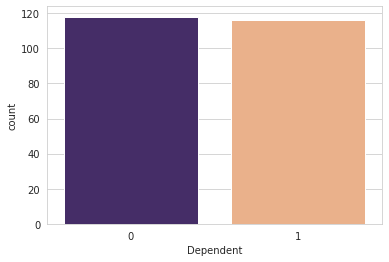

In [9]:
sns.countplot(x = df['Dependent'], orient = "v", palette=['#432371',"#FAAE7B"]);

##### The Dataset is pretty balanced. Hooray!

In [10]:
cols = [col for col in df.columns if df[col].dtypes == 'float32']
cols

['Founders_fortune1000_company_score',
 'Founders_skills_score',
 'Founders_Entrepreneurship_skills_score',
 'Founders_Operations_skills_score',
 'Founders_Engineering_skills_score',
 'Founders_Marketing_skills_score',
 'Founders_Leadership_skills_score',
 'Founders_Data_Science_skills_score',
 'Founders_Business_Strategy_skills_score',
 'Founders_Product_Management_skills_score',
 'Founders_Sales_skills_score',
 'Founders_Domain_skills_score',
 'Company_avg_investment_time']

In [11]:
df_num = df[cols].copy()
df_num.head()

,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_avg_investment_time
0,0.0,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,9.000000
1,0.2,36.0,9.401710,0.000000,57.478634,0.000000,0.000,3.846154,17.094017,9.401710,0.000000,2.777778,7.344444
2,0.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,9.822222
3,0.0,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,9.322222
4,0.0,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,6.400000


In [12]:
pd.set_option('precision',3)
df_num.describe().T[['mean','50%','std','min','max']]

,mean,50%,std,min,max
Founders_fortune1000_company_score,0.273,0.000,0.382,0.0,1.000
Founders_skills_score,20.474,20.000,11.105,0.0,51.500
Founders_Entrepreneurship_skills_score,7.205,6.250,6.883,0.0,31.250
Founders_Operations_skills_score,1.995,0.000,3.859,0.0,20.000
Founders_Engineering_skills_score,18.427,7.493,23.382,0.0,93.333
Founders_Marketing_skills_score,12.019,5.556,17.848,0.0,76.471
Founders_Leadership_skills_score,2.907,0.000,5.531,0.0,40.000
Founders_Data_Science_skills_score,6.363,2.941,10.134,0.0,80.000
Founders_Business_Strategy_skills_score,10.303,7.425,10.035,0.0,47.059
Founders_Product_Management_skills_score,3.468,0.000,5.083,0.0,25.000


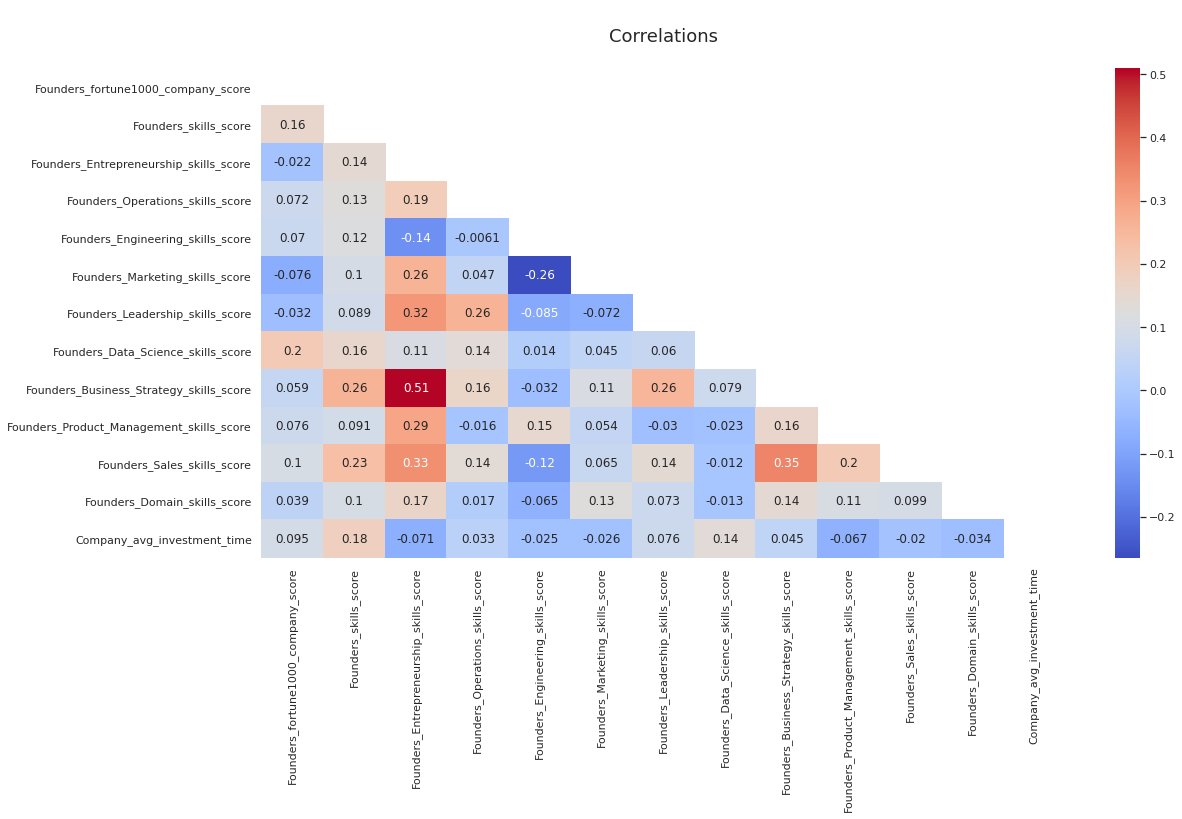

In [13]:
plt.figure(figsize=(18,9))
sns.set(font_scale=1)

mask = np.zeros_like(df_num.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df_num.corr(), mask=mask, annot=True, cmap='coolwarm')
plt.title('\nCorrelations\n', fontsize=18)
plt.show();

There are not much drastic correlations between columns. Except for Founders_Business_Strategy_skills_score which has a positive correlation of 0.51 with Founders_Entrepreneurship_skills_score. We will let it pass for now.

In [14]:
df_num2 = df_num.assign(Dependent=df['Dependent'])
df_num2.head()

,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_avg_investment_time,Dependent
0,0.0,34.0,15.882,11.765,15.000,12.941,0.000,8.824,21.765,10.882,2.941,0.000,9.000,1
1,0.2,36.0,9.402,0.000,57.479,0.000,0.000,3.846,17.094,9.402,0.000,2.778,7.344,1
2,0.0,23.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.822,1
3,0.0,25.0,6.250,0.000,3.125,15.625,9.375,3.125,6.250,3.125,3.125,0.000,9.322,1
4,0.0,4.5,0.000,0.000,10.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.400,1


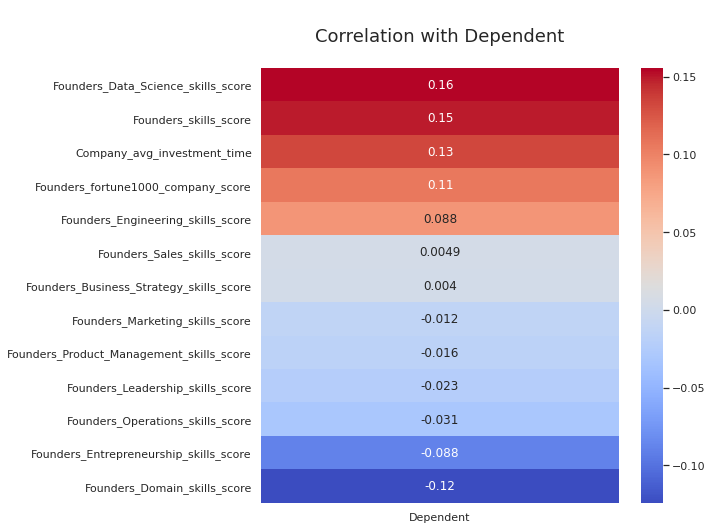

In [15]:
plt.figure(figsize=(8,8))
target = 'Dependent'
sns.heatmap(df_num2.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap='coolwarm')
plt.title(f'\nCorrelation with Dependent\n', fontsize=18)
plt.show();

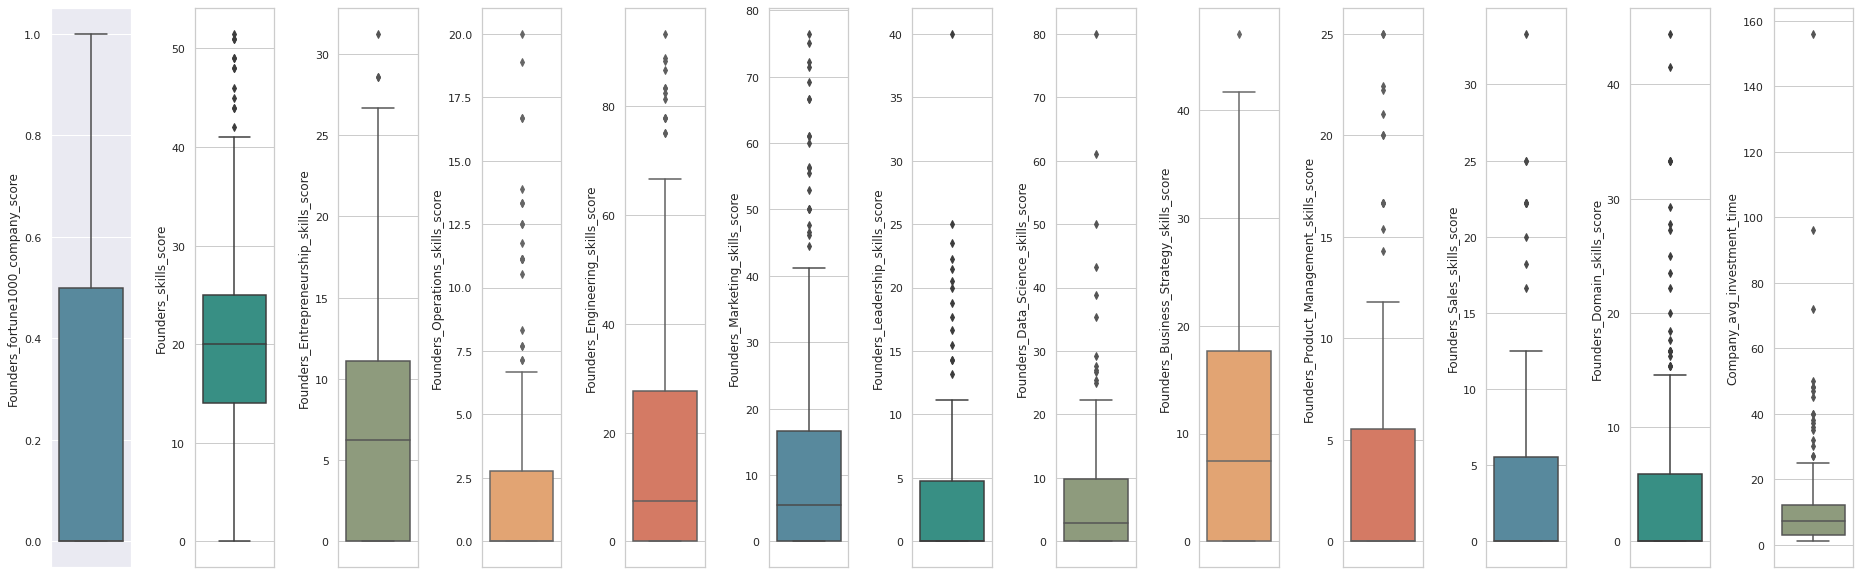

In [16]:
colors = ['#4D8EA8','#2A9D8F','#8FA078','#F4A261','#E76F51']
l = df_num.columns.values
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_num[l[i]],color=colors[i%5],orient='v')
    plt.tight_layout()

We can see a lot of outliers in most of columns. Scores in Different Skills can be ignored for now. But we will keep an eye on Company_avg_investment_time. The two points above 90 can be removed while trying to get better results than Base Model.

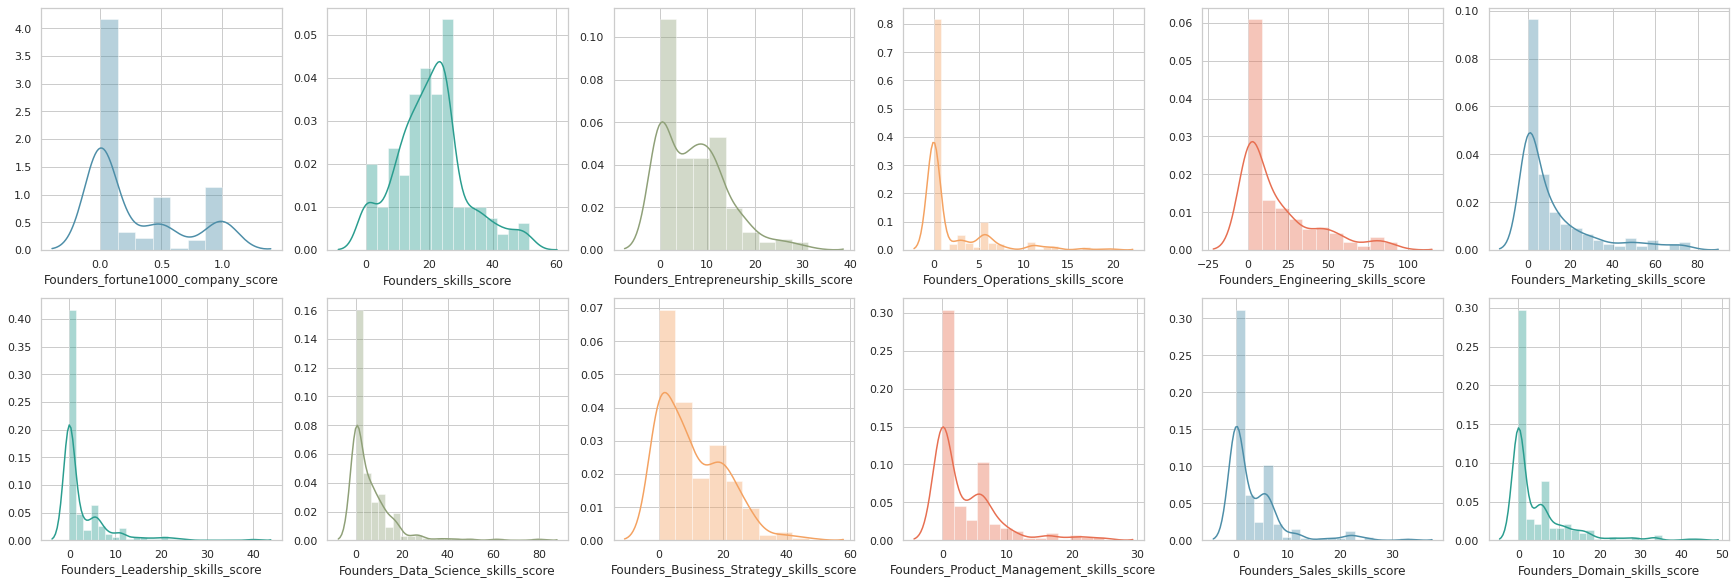

In [17]:
l = df_num.columns.values[:-1]
num_rows = 2
num_cols = 6
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 8), constrained_layout= True, squeeze=False)
for i, var in enumerate(l):
    row = i//num_cols
    pos = i % num_cols
    sns.distplot(df_num[l[i]],color=colors[i%5],ax=axs[row][pos])

As seen above, Most of the skills score are skewed and have a long tail. Only a few startup founders are properly skilled. Well since the dataset is too small we can't do much here.

In [18]:
df_pie = df[['Company_business_model','Founders_profile_similarity','Founders_publications','Company_Product_or_service']]
df_pie.head()

,Company_business_model,Founders_profile_similarity,Founders_publications,Company_Product_or_service
0,B2C,Medium,None,Product
1,B2B,Medium,None,Both
2,B2B,Low,Few,Product
3,Both,Low,None,Service
4,B2B,High,Few,Both


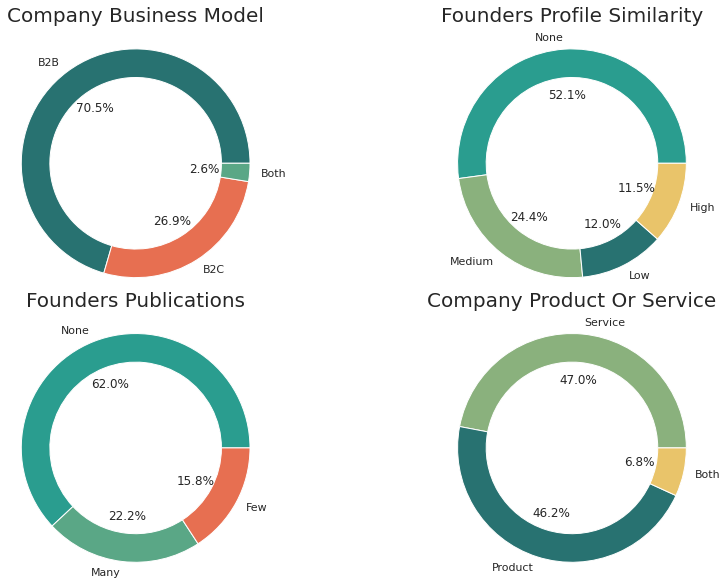

In [19]:
l = df_pie.columns
num_rows = 2
num_cols = 2
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8), constrained_layout= True)
colors = ["#287271","#2a9d8f","#5aa786","#8ab17d","#e9c46a","#f4a261","#e76f51"]
for i, var in enumerate(l):
    row = i//num_cols
    pos = i % num_cols
    axs[row][pos].pie(df_pie[var].value_counts().values, radius=2, colors=random.sample(colors, k=len(df_pie[var].value_counts())),labels=df_pie[var].value_counts().index,autopct='%1.1f%%',wedgeprops=dict(width=0.5, edgecolor='w'))
    axs[row][pos].set_title(f'{var.replace("_"," ").title()}', pad=70, fontdict = {'fontsize' : 20})
  
    

In [20]:
df_funnel = df[['Founders_previous_company_employee_count','Founder_education','Founder_highest_degree_type','Founders_Industry_exposure']]
df_funnel.head()

,Founders_previous_company_employee_count,Founder_education,Founder_highest_degree_type,Founders_Industry_exposure
0,Large,Masters,Management,High
1,Medium,Bachelors,Science,Low
2,Small,Bachelors,Technology,Medium
3,Medium,Masters,Science,Medium
4,Large,Masters,Management,Medium


In [21]:
def funnel_chart(labels_list, title):
  fig = go.Figure(go.Funnelarea(
      text = labels_list.index,
      values = labels_list.values,
      # value count of each funding level
      ))
  fig.update_layout(
    title={
        'text':f'{title}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
  fig.show()
  return

In [22]:
labels_list = df_funnel.Founders_previous_company_employee_count.value_counts()
title = 'Previous Employee Count'
funnel_chart(labels_list, title)

Employees from Small and Medium sized companies tend to go for Start-ups more than Large Companies.

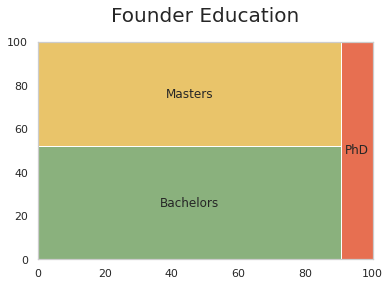

In [23]:
colors = ["#8ab17d","#e9c46a","#e76f51"]
var = df_funnel['Founder_education'].value_counts()
size = var.values
labels = var.index
sq.plot(sizes= size, label=labels, color = colors)
title = 'Founder_education'
plt.title(f'{title.replace("_"," ").title()}', pad=20, fontdict = {'fontsize' : 20})
plt.show()

Only a handful of PhD's opt for Start-up. Interesting!

In [24]:
labels_list = df_funnel.Founder_highest_degree_type.value_counts()
title = 'Highest Degree Type Of Founders'
funnel_chart(labels_list, title)

In [25]:
def grouped_bar_chart(column, color1, color2):
  labels = df[column].value_counts().index
  dep0, dep1 = [], []
  for label in labels:
    dep1.append(df[(df['Dependent'] == 1) & (df[column]== label)][column].count())
    dep0.append(df[(df['Dependent'] == 0) & (df[column]== label)][column].count())
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, dep1, width, label='Successful', color = [color1]*2)
  rects2 = ax.bar(x + width/2, dep0, width, label='Failed', color = [color2]*2)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_title(f'{column.replace("_"," ").title()} Vs Dependent', pad = 20, fontdict= {'fontsize' : 15})
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()

  plt.show()
  return


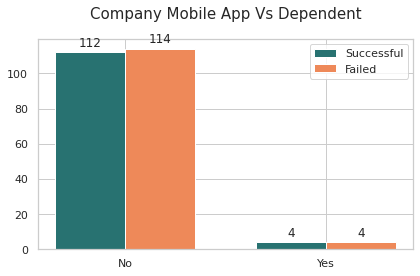

In [26]:
grouped_bar_chart(column='Company_mobile_app', color1='#287271', color2='#EE8959')

Having a mobile app has almost No effect on Start-ups success. I wouldn't have thought that.

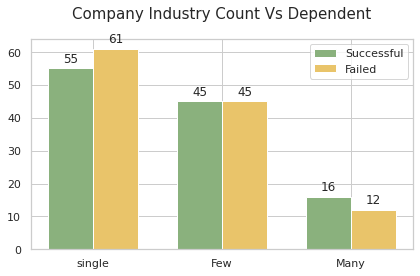

In [27]:
grouped_bar_chart(column='Company_Industry_count', color1='#8AB17D', color2='#E9C46A')

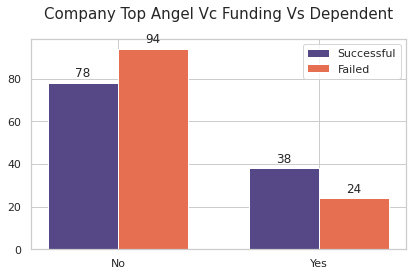

In [28]:
grouped_bar_chart(column='Company_top_Angel_VC_funding', color1='#564787', color2='#E76F51')

Start-ups that lacked funding from Top Angel VC's failed more.

### DATA PREPARATION

In [29]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols.remove('CAX_ID')
obj_cols

['Company_Location',
 'Company_raising_fund',
 'Company_Industry_count',
 'Company_mobile_app',
 'Company_top_Angel_VC_funding',
 'Founders_top_company_experience',
 'Founders_previous_company_employee_count',
 'Founders_startup_experience',
 'Founders_big_5_experience',
 'Company_business_model',
 'Founders_experience',
 'Founders_global_exposure',
 'Founders_Industry_exposure',
 'Founder_education',
 'Founders_profile_similarity',
 'Founders_publications',
 'Company_incubation_investor',
 'Company_crowdsourcing',
 'Company_crowdfunding',
 'Company_big_data',
 'Company_Product_or_service',
 'Company_subscription_offering',
 'Founder_highest_degree_type',
 'Company_difficulty_obtaining_workforce',
 'Company_Founder_Patent']

In [30]:
bin_cols = [] 
for i in (1,3,4,5,7,8,11,16,17,18,19,21,24):
  bin_cols.append(obj_cols[i])
bin_cols

['Company_raising_fund',
 'Company_mobile_app',
 'Company_top_Angel_VC_funding',
 'Founders_top_company_experience',
 'Founders_startup_experience',
 'Founders_big_5_experience',
 'Founders_global_exposure',
 'Company_incubation_investor',
 'Company_crowdsourcing',
 'Company_crowdfunding',
 'Company_big_data',
 'Company_subscription_offering',
 'Company_Founder_Patent']

In [31]:
nom_cols = []
for i in (0,2,9,13,15,20,22):
  nom_cols.append(obj_cols[i])
nom_cols

['Company_Location',
 'Company_Industry_count',
 'Company_business_model',
 'Founder_education',
 'Founders_publications',
 'Company_Product_or_service',
 'Founder_highest_degree_type']

In [32]:
ord_cols = []
for i in (6,10,12,14,23):
  ord_cols.append(obj_cols[i])
ord_cols

['Founders_previous_company_employee_count',
 'Founders_experience',
 'Founders_Industry_exposure',
 'Founders_profile_similarity',
 'Company_difficulty_obtaining_workforce']

In [33]:
df_ml = df.copy()

In [34]:
for col in bin_cols:
  df_ml[col] = df_ml[col].replace({'Yes':1, 'No':0})

In [35]:
df_ml = pd.get_dummies(df_ml, columns= nom_cols)
df_ml.head(10)

,CAX_ID,Dependent,Company_raising_fund,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_subscription_offering,Company_difficulty_obtaining_workforce,Company_Founder_Patent,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_business_model_B2B,Company_business_model_B2C,Company_business_model_Both,Founder_education_Bachelors,Founder_education_Masters,Founder_education_PhD,Founders_publications_Few,Founders_publications_Many,Founders_publications_None,Company_Product_or_service_Both,Company_Product_or_service_Product,Company_Product_or_service_Service,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology
0,Company2,1,0,1,5,0,2,0,4,0,0,1,Large,1,0,High,1,High,4,1,0.0,Medium,34.0,15.882,11.765,15.000,12.941,0.000,8.824,21.765,10.882,2.941,0.000,0,0,10,9.000,1,0,0,2,0,Medium,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1,Company3,1,0,0,15,0,3,0,7,0,0,1,Medium,0,0,Medium,1,Low,1,1,0.2,Medium,36.0,9.402,0.000,57.479,0.000,0.000,3.846,17.094,9.402,0.000,2.778,1,0,2,7.344,0,0,0,1,1,Medium,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,Company5,1,0,0,7,0,1,1,8,0,0,0,Small,0,0,High,1,Medium,0,1,0.0,Low,23.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,13,9.822,0,0,0,0,0,Medium,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,Company6,1,0,0,2,0,4,0,4,0,2,0,Medium,0,0,High,1,Medium,0,1,0.0,Low,25.0,6.250,0.000,3.125,15.625,9.375,3.125,6.250,3.125,3.125,0.000,1,0,12,9.322,0,0,0,0,0,Medium,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,Company8,1,0,0,0,0,3,4,4,0,0,0,Large,1,0,High,1,Medium,4,1,0.0,High,4.5,0.000,0.000,10.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,20,6.400,0,0,0,2,0,Medium,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
5,Company9,1,0,0,13,0,2,0,2,0,0,1,Medium,1,0,High,1,High,4,1,0.0,Medium,48.0,8.333,0.000,46.732,5.719,8.333,0.000,19.771,2.778,2.778,0.000,0,0,18,12.000,1,0,0,0,0,Medium,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
6,Company11,1,0,0,0,0,2,1,8,0,0,0,Small,1,0,High,1,High,0,1,0.2,None,14.5,3.846,0.000,26.923,0.000,3.846,3.846,7.692,0.000,3.846,0.000,0,4,24,2.667,0,0,0,0,0,Medium,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
7,Company13,1,0,0,0,0,0,1,8,0,1,0,Medium,1,0,High,1,Medium,0,1,0.5,None,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,12,6.000,0,0,0,0,0,Medium,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,Company14,1,0,0,0,0,3,0,6,0,0,0,Large,1,1,Medium,1,Low,4,1,0.2,Medium,20.5,8.333,0.000,50.000,16.667,0.000,12.500,4.167,4.167,4.167,0.000,1,0,14,7.333,0,0,0,0,1,Medium,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
9,Company15,0,0,0,0,2,2,0,5,0,0,0,Medium,0,0,High,1,High,4,1,0.0,High,22.5,13.333,0.000,6.667,60.000,0.000,13.333,6.667,0.000,0.000,0.000,0,0,48,48.000,0,0,0,2,0,Medium,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0


In [36]:
ord = {'High':3,
       'Medium':2,
       'Low':1, 
       'None':0}
ord1 = {'High':3,
        'Medium':2,
        'Low':1}
ord2 = {'Large':3, 
            'Medium':2, 
            'Small':1, 
            }

df_ml['Founders_previous_company_employee_count'] = df_ml.Founders_previous_company_employee_count.map(ord2)
df_ml['Founders_profile_similarity'] = df_ml.Founders_profile_similarity.map(ord)
for i in (1,2,4):
  df_ml[ord_cols[i]] = df_ml[ord_cols[i]].map(ord1)

df_ml.head(10)

,CAX_ID,Dependent,Company_raising_fund,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_subscription_offering,Company_difficulty_obtaining_workforce,Company_Founder_Patent,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_business_model_B2B,Company_business_model_B2C,Company_business_model_Both,Founder_education_Bachelors,Founder_education_Masters,Founder_education_PhD,Founders_publications_Few,Founders_publications_Many,Founders_publications_None,Company_Product_or_service_Both,Company_Product_or_service_Product,Company_Product_or_service_Service,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology
0,Company2,1,0,1,5,0,2,0,4,0,0,1,3,1,0,3,1,3,4,1,0.0,2,34.0,15.882,11.765,15.000,12.941,0.000,8.824,21.765,10.882,2.941,0.000,0,0,10,9.000,1,0,0,2,0,2,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1,Company3,1,0,0,15,0,3,0,7,0,0,1,2,0,0,2,1,1,1,1,0.2,2,36.0,9.402,0.000,57.479,0.000,0.000,3.846,17.094,9.402,0.000,2.778,1,0,2,7.344,0,0,0,1,1,2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,Company5,1,0,0,7,0,1,1,8,0,0,0,1,0,0,3,1,2,0,1,0.0,1,23.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,13,9.822,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,Company6,1,0,0,2,0,4,0,4,0,2,0,2,0,0,3,1,2,0,1,0.0,1,25.0,6.250,0.000,3.125,15.625,9.375,3.125,6.250,3.125,3.125,0.000,1,0,12,9.322,0,0,0,0,0,2,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,Company8,1,0,0,0,0,3,4,4,0,0,0,3,1,0,3,1,2,4,1,0.0,3,4.5,0.000,0.000,10.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,20,6.400,0,0,0,2,0,2,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
5,Company9,1,0,0,13,0,2,0,2,0,0,1,2,1,0,3,1,3,4,1,0.0,2,48.0,8.333,0.000,46.732,5.719,8.333,0.000,19.771,2.778,2.778,0.000,0,0,18,12.000,1,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
6,Company11,1,0,0,0,0,2,1,8,0,0,0,1,1,0,3,1,3,0,1,0.2,0,14.5,3.846,0.000,26.923,0.000,3.846,3.846,7.692,0.000,3.846,0.000,0,4,24,2.667,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
7,Company13,1,0,0,0,0,0,1,8,0,1,0,2,1,0,3,1,2,0,1,0.5,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,12,6.000,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,Company14,1,0,0,0,0,3,0,6,0,0,0,3,1,1,2,1,1,4,1,0.2,2,20.5,8.333,0.000,50.000,16.667,0.000,12.500,4.167,4.167,4.167,0.000,1,0,14,7.333,0,0,0,0,1,2,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
9,Company15,0,0,0,0,2,2,0,5,0,0,0,2,0,0,3,1,3,4,1,0.0,3,22.5,13.333,0.000,6.667,60.000,0.000,13.333,6.667,0.000,0.000,0.000,0,0,48,48.000,0,0,0,2,0,2,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0


In [37]:
df_ml.shape

(234, 66)

In [38]:
df_ml.head(10)

,CAX_ID,Dependent,Company_raising_fund,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_subscription_offering,Company_difficulty_obtaining_workforce,Company_Founder_Patent,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_business_model_B2B,Company_business_model_B2C,Company_business_model_Both,Founder_education_Bachelors,Founder_education_Masters,Founder_education_PhD,Founders_publications_Few,Founders_publications_Many,Founders_publications_None,Company_Product_or_service_Both,Company_Product_or_service_Product,Company_Product_or_service_Service,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology
0,Company2,1,0,1,5,0,2,0,4,0,0,1,3,1,0,3,1,3,4,1,0.0,2,34.0,15.882,11.765,15.000,12.941,0.000,8.824,21.765,10.882,2.941,0.000,0,0,10,9.000,1,0,0,2,0,2,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1,Company3,1,0,0,15,0,3,0,7,0,0,1,2,0,0,2,1,1,1,1,0.2,2,36.0,9.402,0.000,57.479,0.000,0.000,3.846,17.094,9.402,0.000,2.778,1,0,2,7.344,0,0,0,1,1,2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
2,Company5,1,0,0,7,0,1,1,8,0,0,0,1,0,0,3,1,2,0,1,0.0,1,23.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,13,9.822,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,Company6,1,0,0,2,0,4,0,4,0,2,0,2,0,0,3,1,2,0,1,0.0,1,25.0,6.250,0.000,3.125,15.625,9.375,3.125,6.250,3.125,3.125,0.000,1,0,12,9.322,0,0,0,0,0,2,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,Company8,1,0,0,0,0,3,4,4,0,0,0,3,1,0,3,1,2,4,1,0.0,3,4.5,0.000,0.000,10.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,20,6.400,0,0,0,2,0,2,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
5,Company9,1,0,0,13,0,2,0,2,0,0,1,2,1,0,3,1,3,4,1,0.0,2,48.0,8.333,0.000,46.732,5.719,8.333,0.000,19.771,2.778,2.778,0.000,0,0,18,12.000,1,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
6,Company11,1,0,0,0,0,2,1,8,0,0,0,1,1,0,3,1,3,0,1,0.2,0,14.5,3.846,0.000,26.923,0.000,3.846,3.846,7.692,0.000,3.846,0.000,0,4,24,2.667,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
7,Company13,1,0,0,0,0,0,1,8,0,1,0,2,1,0,3,1,2,0,1,0.5,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,12,6.000,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,Company14,1,0,0,0,0,3,0,6,0,0,0,3,1,1,2,1,1,4,1,0.2,2,20.5,8.333,0.000,50.000,16.667,0.000,12.500,4.167,4.167,4.167,0.000,1,0,14,7.333,0,0,0,0,1,2,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
9,Company15,0,0,0,0,2,2,0,5,0,0,0,2,0,0,3,1,3,4,1,0.0,3,22.5,13.333,0.000,6.667,60.000,0.000,13.333,6.667,0.000,0.000,0.000,0,0,48,48.000,0,0,0,2,0,2,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0


In [39]:
df_ml.to_csv('StartupReadyML.csv',index=False)

### MODEL FITTING

#### Base Model

In [40]:
Y = df_ml.iloc[:,1]
X = df_ml.iloc[:,2:]
X.shape, Y.shape

((234, 64), (234,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

In [42]:
logreg = LogisticRegression().fit(X_train, y_train)

In [43]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int8)

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  7]
 [12 14]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.67      0.60        21
           1       0.67      0.54      0.60        26

    accuracy                           0.60        47
   macro avg       0.60      0.60      0.60        47
weighted avg       0.61      0.60      0.60        47



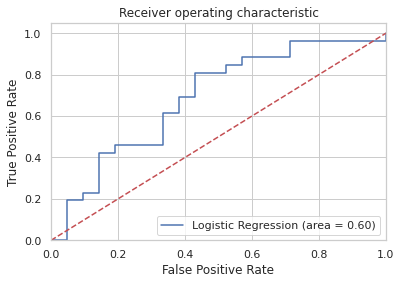

In [46]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### We will keep this as our base model. We hit an F1 score of 0.60 and AUC score as 0.60 too.

##### Trial of some techniques to get better results. 
#### Iteration 1

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [48]:
logreg2 = LogisticRegression().fit(X_train2, y_train)

In [49]:
y_pred2 = logreg2.predict(X_test2)
y_pred2

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0], dtype=int8)

In [50]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[16  5]
 [12 14]]


In [51]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65        21
           1       0.74      0.54      0.62        26

    accuracy                           0.64        47
   macro avg       0.65      0.65      0.64        47
weighted avg       0.66      0.64      0.64        47



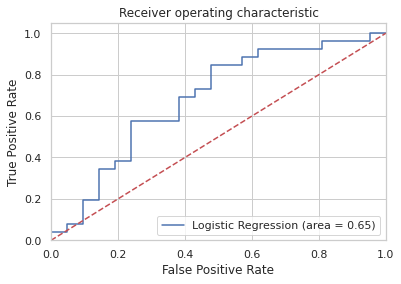

In [52]:
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### This was a good trial. We hit a F1 score of 0.65 and 0.62 for respective classes and AUC score of 0.65.

#### Iteration 2

In [53]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train3 = scaler.transform(X_train)
X_test3 = scaler.transform(X_test)

In [54]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train3, y_train.ravel())

clf = LogisticRegression()
logreg3 = clf.fit(X_train_res, y_train_res)

In [55]:
y_pred3 = logreg3.predict(X_test3)
y_pred3

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0], dtype=int8)

In [56]:
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[16  5]
 [13 13]]


In [57]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64        21
           1       0.72      0.50      0.59        26

    accuracy                           0.62        47
   macro avg       0.64      0.63      0.62        47
weighted avg       0.65      0.62      0.61        47



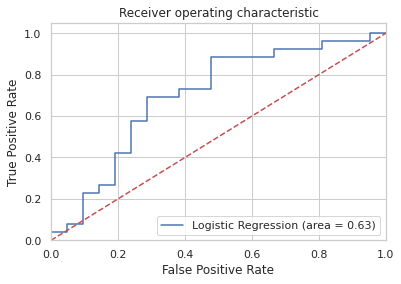

In [58]:
logit_roc_auc = roc_auc_score(y_test, logreg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### The results are better than base model but use of SMOTE hit F1 score as well as AUC score.

#### Trials Over.

### Predicting Given Test Data

In [59]:
df_test = pd.read_csv('https://raw.githubusercontent.com/jha-vineet69/Start-Up-Business-Analysis/master/TestData.csv')
df_test.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,NaN,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,No,0,16,11.560,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,NaN,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,Yes,2,1,8.700,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,NaN,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000,0.0,66.667,5.556,0.000,22.222,0.000,0.000,0.0,5.556,No,0,11,7.311,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,NaN,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333,0.0,27.083,19.792,0.000,23.958,0.000,0.000,0.0,20.833,No,0,5,5.000,No,No,No,1,Product,No,Science,High,No
4,Company12,NaN,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.273,0.0,18.182,0.000,9.091,0.000,36.364,9.091,0.0,0.000,No,0,18,3.850,No,No,No,0,Product,No,Science,Medium,Yes


In [60]:
del df_test['Dependent']
df_test.head()

,CAX_ID,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,No,0,16,11.560,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,Yes,2,1,8.700,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000,0.0,66.667,5.556,0.000,22.222,0.000,0.000,0.0,5.556,No,0,11,7.311,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333,0.0,27.083,19.792,0.000,23.958,0.000,0.000,0.0,20.833,No,0,5,5.000,No,No,No,1,Product,No,Science,High,No
4,Company12,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.273,0.0,18.182,0.000,9.091,0.000,36.364,9.091,0.0,0.000,No,0,18,3.850,No,No,No,0,Product,No,Science,Medium,Yes


In [61]:
def preprocess(df_process):
  for col in bin_cols:
    df_process[col] = df_process[col].replace({'Yes':1, 'No':0})
  df_process = pd.get_dummies(df_process, columns= nom_cols)
  df_process['Founders_previous_company_employee_count'] = df_process.Founders_previous_company_employee_count.map(ord2)
  df_process['Founders_profile_similarity'] = df_process.Founders_profile_similarity.map(ord)
  for i in (1,2,4):
    df_process[ord_cols[i]] = df_process[ord_cols[i]].map(ord1)
  return df_process



In [62]:
df_test = preprocess(df_test)
df_test.head()

,CAX_ID,Company_raising_fund,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_subscription_offering,Company_difficulty_obtaining_workforce,Company_Founder_Patent,Company_Location_Europe,Company_Location_Other,Company_Location_USA,Company_Industry_count_Few,Company_Industry_count_Many,Company_Industry_count_single,Company_business_model_B2B,Company_business_model_B2C,Company_business_model_Both,Founder_education_Bachelors,Founder_education_Masters,Founder_education_PhD,Founders_publications_Few,Founders_publications_Many,Founders_publications_None,Company_Product_or_service_Both,Company_Product_or_service_Product,Company_Product_or_service_Service,Founder_highest_degree_type_Management,Founder_highest_degree_type_Other,Founder_highest_degree_type_Science,Founder_highest_degree_type_Technology
0,Company1,0,0,2,0,1,2,2,1,4,0,1,0,0,3,1,1,4,1,0.0,0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0,0,16,11.560,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
1,Company4,0,0,6,0,2,0,4,1,0,0,3,1,0,2,1,1,1,1,0.0,2,15.5,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,1,2,1,8.700,1,0,0,0,1,2,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,Company7,0,0,7,0,2,9,2,0,4,0,1,1,0,3,1,2,0,1,0.0,1,21.0,0.000,0.0,66.667,5.556,0.000,22.222,0.000,0.000,0.0,5.556,0,0,11,7.311,0,0,0,1,1,2,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,Company10,0,0,0,0,3,4,3,0,0,1,2,1,0,3,1,3,4,1,0.0,2,25.5,8.333,0.0,27.083,19.792,0.000,23.958,0.000,0.000,0.0,20.833,0,0,5,5.000,0,0,0,1,0,3,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,Company12,0,0,0,1,0,1,7,0,1,0,1,1,0,3,1,3,4,1,0.0,1,12.0,27.273,0.0,18.182,0.000,9.091,0.000,36.364,9.091,0.0,0.000,0,0,18,3.850,0,0,0,0,0,2,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [63]:
X_test = df_test.iloc[:,1:]
X_test.shape

(80, 64)

In [64]:
X_test = scaler.transform(X_test)
y_pred_test2 = logreg2.predict(X_test)
y_pred_test2

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int8)

In [65]:
fill_val = pd.DataFrame(list(zip(df_test['CAX_ID'],y_pred_test2)), columns = ['CAX_ID','Dependent'])
fill_val.head()

,CAX_ID,Dependent
0,Company1,0
1,Company4,1
2,Company7,0
3,Company10,1
4,Company12,1


In [66]:
fill_val.to_csv('Submission.csv', index=False)